# What can Nomis do?
### Nomis can use Predictive Models to Decide if a Quoted APR would a "Funded Loan" or a "Lost sale"
### Then we use that predict to either increase APR rate on "Funded Loan" or decrease APR so that a "Lost Sale" can be converted into a "Funded Loan"



In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/Users/agowda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Convert the File into CSV

In [3]:
nomis_raw_df = pd.read_csv("/Users/agowda/Downloads/nomis_eCar.csv")

### Previous Rate is only Valid if "Car Type" is Refinanced, else it is considered as 0

In [4]:
nomis_raw_df['Previous Rate'][nomis_raw_df['Car  Type']=='N']=0
nomis_raw_df['Previous Rate'][nomis_raw_df['Car  Type']=='U']=0
nomis_raw_df.fillna(0)
#Car_type_Prev_Rate = {'N':0,'U':0}
#nomis_raw_df['Previous Rate'] = nomis_raw_df['Car  Type'].map(Car_type_Prev_Rate)

/Users/agowda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/agowda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/02,72.0,35000.00,0,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.00,0,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.00,0,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.00,0,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.00,0,N,5.65,0.0,5.49,1.8388,1.0
5,2.0,725.0,7/1/02,36.0,10000.00,0,N,4.95,0.0,5.79,1.8388,3.0
6,1.0,808.0,7/1/02,72.0,19000.00,0,N,6.25,0.0,6.59,1.8388,3.0
7,1.0,779.0,7/1/02,48.0,25000.00,0,U,5.85,0.0,5.85,1.8388,3.0
8,4.0,664.0,7/1/02,72.0,7500.00,0,N,6.25,0.0,8.99,1.8388,3.0
9,2.0,706.0,7/1/02,60.0,22000.00,0,N,5.65,0.0,5.79,1.8388,3.0


In [5]:
nomis_raw_df.isnull().any()

Tier                True
FICO                True
Approve Date        True
Term                True
Amount              True
Previous Rate       True
Car  Type           True
Competition rate    True
Outcome             True
Rate                True
Cost of Funds       True
Partner Bin         True
dtype: bool

In [6]:
sum(pd.isnull(nomis_raw_df['Approve Date']))

3

### Drop rows with missing, only a few Data Points are removed

In [7]:
nomis_filled_df = nomis_raw_df.dropna(axis=0,how='any')

### OneHotEncode on Car Type, Partner Bin, Tier as they are Categorical Variables

In [8]:

car_type = nomis_filled_df['Car  Type']
car_type_df = pd.get_dummies(car_type, prefix= "Car_type")

Partner_bin = nomis_filled_df['Partner Bin']
Partner_df = pd.get_dummies(Partner_bin, prefix= "Partner")

Tier = nomis_filled_df['Tier']
Tier_df = pd.get_dummies(Tier, prefix="Tier")

In [9]:
nomis_cat_df = pd.concat([nomis_filled_df, car_type_df, Partner_df, Tier_df], axis=1)

In [10]:
Outcome = nomis_cat_df['Outcome']
nomis_cat_df.drop(['Tier','Car  Type','Partner Bin', 'Approve Date','Outcome'], axis=1, inplace=True)

In [35]:
outcome_count = dict(Outcome.value_counts())
outcome_count

{0.0: 162298, 1.0: 45787}

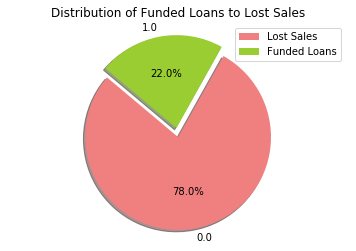

In [36]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(outcome_count.keys())
sizes = list(outcome_count.values())
colors = ['lightcoral', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Funded Loans to Lost Sales")
plt.axis('equal')
plt.legend(labels=["Lost Sales","Funded Loans"])
plt.show()

### Split Train and Test Data by 80 : 20  Ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(nomis_cat_df, Outcome, test_size=0.20, random_state=42,stratify=Outcome)

### First Pass Random Forest Classifier


In [91]:
Rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=50)
Rf.fit(X_train, y_train)
y_pred_rf = Rf.predict(X_test)
print(classification_report(y_test,y_pred_rf, target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.81      0.99      0.89     32460
Funded Loans       0.83      0.17      0.28      9157

 avg / total       0.81      0.81      0.76     41617



## Random Forest with "Balanced" class_weight

In [90]:
Rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=50, class_weight = "balanced")
Rf.fit(X_train, y_train)
y_pred_rf = Rf.predict(X_test)
print(classification_report(y_test,y_pred_rf, target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.92      0.70      0.80     32460
Funded Loans       0.43      0.80      0.56      9157

 avg / total       0.82      0.72      0.74     41617



### Notice how "Bad Loans" with Label 0 have high Precision and Recall, which might be relevant for our business case. Further e_Car can be quizzed to get an exact Cost function to induce optimal Penalty for misclassification

In [15]:
Rf.score(X_test, y_test)

0.77948915106807315

### Grid Search Across Tree Depth and number of Trees

In [51]:
params={'max_depth' : np.arange(5,7,1),'n_estimators':np.arange(80,100,10)}
Grid_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"),params, scoring = "f1")

In [52]:
Grid_rf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([5, 6]), 'n_estimators': array([80, 90])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [53]:
y_pred_grid_rf = Grid_rf.predict(X_test)
print(classification_report(y_test,y_pred_grid_rf, target_names=["Lost Sales","Funded Loans"]))
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

              precision    recall  f1-score   support

  Lost Sales       0.93      0.77      0.84     32460
Funded Loans       0.49      0.79      0.60      9157

 avg / total       0.83      0.77      0.79     41617

{'max_depth': 6, 'n_estimators': 80}
0.604449144762


In [55]:
pd.DataFrame(Grid_rf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.129844,0.396199,0.588907,0.590138,5,80,"{'max_depth': 5, 'n_estimators': 80}",3,0.590637,0.591775,0.586174,0.589096,0.589909,0.589544,0.254665,0.031128,0.001955,0.001171
1,4.114656,0.408961,0.587203,0.588488,5,90,"{'max_depth': 5, 'n_estimators': 90}",4,0.587688,0.588458,0.585643,0.589326,0.588278,0.587680,0.221109,0.015799,0.001129,0.000672
2,4.229750,0.389258,0.604449,0.606216,6,80,"{'max_depth': 6, 'n_estimators': 80}",1,0.607010,0.607121,0.604215,0.608042,0.602122,0.603484,0.311574,0.029795,0.002002,0.001968
3,4.464384,0.422288,0.602970,0.604935,6,90,"{'max_depth': 6, 'n_estimators': 90}",2,0.602523,0.603611,0.604027,0.607334,0.602359,0.603860,0.019965,0.012537,0.000751,0.001700


### First Pass Gradient Boost

In [92]:
gb = GradientBoostingClassifier(n_estimators=30,learning_rate=0.3)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [93]:
y_gb_pred = gb.predict(X_test)
print(classification_report(y_test,y_gb_pred, target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.87      0.95      0.91     32460
Funded Loans       0.72      0.50      0.59      9157

 avg / total       0.84      0.85      0.84     41617



### This gives better result.
### Now we could try grid search over this to see if our result improves

In [62]:
gb_params = {"n_estimators":np.arange(40,80,10),"learning_rate":np.arange(0.05,0.3,0.05)}
grid_gb = GridSearchCV(GradientBoostingClassifier(),gb_params)
grid_gb.fit(X_train,y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([40, 50, 60, 70]), 'learning_rate': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print(classification_report(y_test, grid_gb.predict(X_test), target_names=["Lost Sales","Funded Loans"]))
print(grid_gb.best_params_)

              precision    recall  f1-score   support

  Lost Sales       0.87      0.94      0.91     32460
Funded Loans       0.73      0.52      0.61      9157

 avg / total       0.84      0.85      0.84     41617

{'learning_rate': 0.25, 'n_estimators': 70}


In [68]:

lr = LogisticRegression(max_iter=400)
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)
print(classification_report(y_test,y_lr_pred, target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.81      0.96      0.88     32460
Funded Loans       0.58      0.22      0.32      9157

 avg / total       0.76      0.79      0.76     41617



In [86]:
scaler = StandardScaler()
X_train_preprocessed_std = scaler.fit_transform(X_train)
X_test_preprocessed_std = scaler.fit_transform(X_test)
lr_std = LogisticRegression(class_weight="balanced")
lr_std.fit(X_train_preprocessed_std,y_train)
y_lr_pred = lr_std.predict(X_test_preprocessed_std)
print(classification_report(y_test,y_lr_pred, target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.92      0.78      0.85     32460
Funded Loans       0.50      0.77      0.61      9157

 avg / total       0.83      0.78      0.79     41617



In [87]:
scaler = MinMaxScaler()
X_train_preprocessed = scaler.fit_transform(X_train)
X_test_preprocessed = scaler.fit_transform(X_test)
lr_max = LogisticRegression(class_weight="balanced")
lr_max.fit(X_train_preprocessed,y_train)
y_lr_pred = lr_max.predict(X_test_preprocessed)
print(classification_report(y_test,y_lr_pred, target_names=["Lost Sales","Funded Loans"]))


              precision    recall  f1-score   support

  Lost Sales       0.93      0.75      0.83     32460
Funded Loans       0.47      0.80      0.60      9157

 avg / total       0.83      0.76      0.78     41617



### Plot ROC curves for different Models, to test which would be better

In [82]:
def add_roc_curve(y_pred, model_name, y_test=y_test, plt=plt):
    fpr, tpr, thres = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred),2)
    plt.plot(1-fpr,tpr,label="{model_name}, auc={auc}".format(model_name=model_name,auc=auc))
    plt.legend(loc=0)
    return(plt)


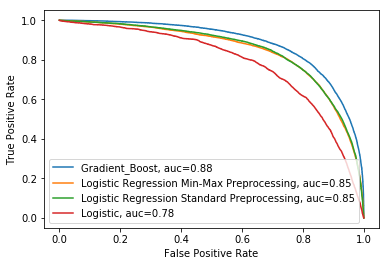

In [88]:
lr_pred_prob = pd.DataFrame(lr.predict_proba(X_test))[1]
lr_std_pred_prob = pd.DataFrame(lr_std.predict_proba(X_test_preprocessed_std))[1]
lr_max = pd.DataFrame(lr_max.predict_proba(X_test_preprocessed))[1]
gb_pred = pd.DataFrame(gb.predict_proba(X_test))[1]
plt = add_roc_curve(y_pred=gb_pred,model_name="Gradient_Boost")
plt = add_roc_curve(y_pred=lr_max,model_name="Logistic Regression Min-Max Preprocessing")
plt = add_roc_curve(y_pred=lr_std_pred_prob,model_name="Logistic Regression Standard Preprocessing")
plt = add_roc_curve(y_pred=lr_pred_prob,model_name="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Result for the Comparision of Models

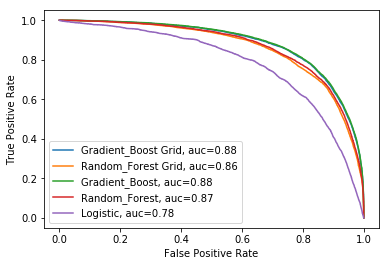

In [85]:
grid_gb_pred_prob = pd.DataFrame(grid_gb.predict_proba(X_test))[1]
grid_rf_pred_prob = pd.DataFrame(Grid_rf.predict_proba(X_test))[1]
rf_pred = pd.DataFrame(Rf.predict_proba(X_test))[1]
gb_pred = pd.DataFrame(gb.predict_proba(X_test))[1]
lr_pred = pd.DataFrame(lr.predict_proba(X_test))[1]
plt = add_roc_curve(y_pred=grid_gb_pred_prob,model_name="Gradient_Boost Grid")
plt = add_roc_curve(y_pred=grid_rf_pred_prob,model_name="Random_Forest Grid")
plt = add_roc_curve(y_pred=gb_pred,model_name="Gradient_Boost")
plt = add_roc_curve(y_pred=rf_pred,model_name="Random_Forest")
plt = add_roc_curve(y_pred=lr_pred,model_name="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# The Best Model we have is a Gradient Boosted Tree Model
## The results of the Prediction on the Test Split are as follows:

In [100]:
print(classification_report(y_test, grid_gb.predict(X_test), target_names=["Lost Sales","Funded Loans"]))

              precision    recall  f1-score   support

  Lost Sales       0.87      0.94      0.91     32460
Funded Loans       0.73      0.52      0.61      9157

 avg / total       0.84      0.85      0.84     41617



In [101]:

lr_max = LogisticRegression(class_weight="balanced")
lr_max.fit(X_train,y_train)
y_lr_pred = lr_max.predict(X_test)
print(classification_report(y_test,y_lr_pred, target_names=["Lost Sales","Funded Loans"]))


              precision    recall  f1-score   support

  Lost Sales       0.92      0.78      0.84     32460
Funded Loans       0.50      0.77      0.60      9157

 avg / total       0.83      0.78      0.79     41617



In [102]:
lr_max.coef_

array([[ -6.23765137e-04,   4.02387896e-02,  -7.66745333e-05,
          1.51201875e-01,   3.03456510e-01,  -4.12227644e-01,
          1.26978091e-01,  -8.22004137e-01,  -2.59863218e-01,
          1.13866074e+00,   5.78510491e-01,  -8.40689011e-01,
          3.18971901e-01,   4.25490940e-02,  -1.04009307e-01,
         -3.04216656e-02,   1.48675260e-01]])